# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [3]:
from sklearn.svm import SVC
import numpy as np

In [2]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

In [9]:
def is_shattered(d, n, S_n):
    for i in range(1,n):
        for idx in combinations(range(n),i):
            y = np.ones((n,))
            y[[idx]] = 0
            if len(np.unique(y)) == 1:
                continue
            
            svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
            svc.fit(S_n, y)
            if not np.array_equal(svc.predict(S_n), y):
                return False
    return True

### c)

In [ ]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

n=2

In [10]:
d=2
n=4
S_2 = np.array([[1,3],[3,1],[5,3],[3,5]])

In [11]:
is_shattered(d, n, S_2)

False

In [16]:
import matplotlib.pyplot as plt

In [12]:
def generate_class_combinations(n):
    Y = []
    for i in range(n+1):
            for idx in combinations(range(n),i):
                y = np.ones((n,))
                y[[idx]] = 0
                Y.append(y)
    return Y

In [13]:
Y = generate_class_combinations(4)

In [62]:
def is_shattered_plot(S_n, Y, n=4):
    fig, axs=plt.subplots(n,n,figsize=(12,12))
    for i in range(n):
        for j in range(n):
            k = i * n + j
            y = Y[k]

            axs[i,j].scatter(S_2[:,0],S_2[:,1],c=y,edgecolors='black')
            if len(np.unique(y)) == 1:
                axs[i,j].set_title('Single class')
            else:
                svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
                svc.fit(S_n, y)
                if not np.array_equal(svc.predict(S_n), y):
                    axs[i,j].set_title("Not linearly separable")
                else:
                    axs[i,j].set_title("Linearly separable")

                    if svc.coef_[0,1] == 0:
                        axs[i,j].axvline(x=-svc.intercept_[0]/svc.coef_[0,0],color='red')
                        continue
                    x_values = np.linspace(min(S_n[:, 0]) - 1, max(S_n[:, 0]) + 1, 100)
                    y_values = (-svc.coef_[0,0] * x_values - svc.intercept_[0]) / svc.coef_[0,1]
                    axs[i,j].plot(x_values, y_values,color='red')        
    plt.show()

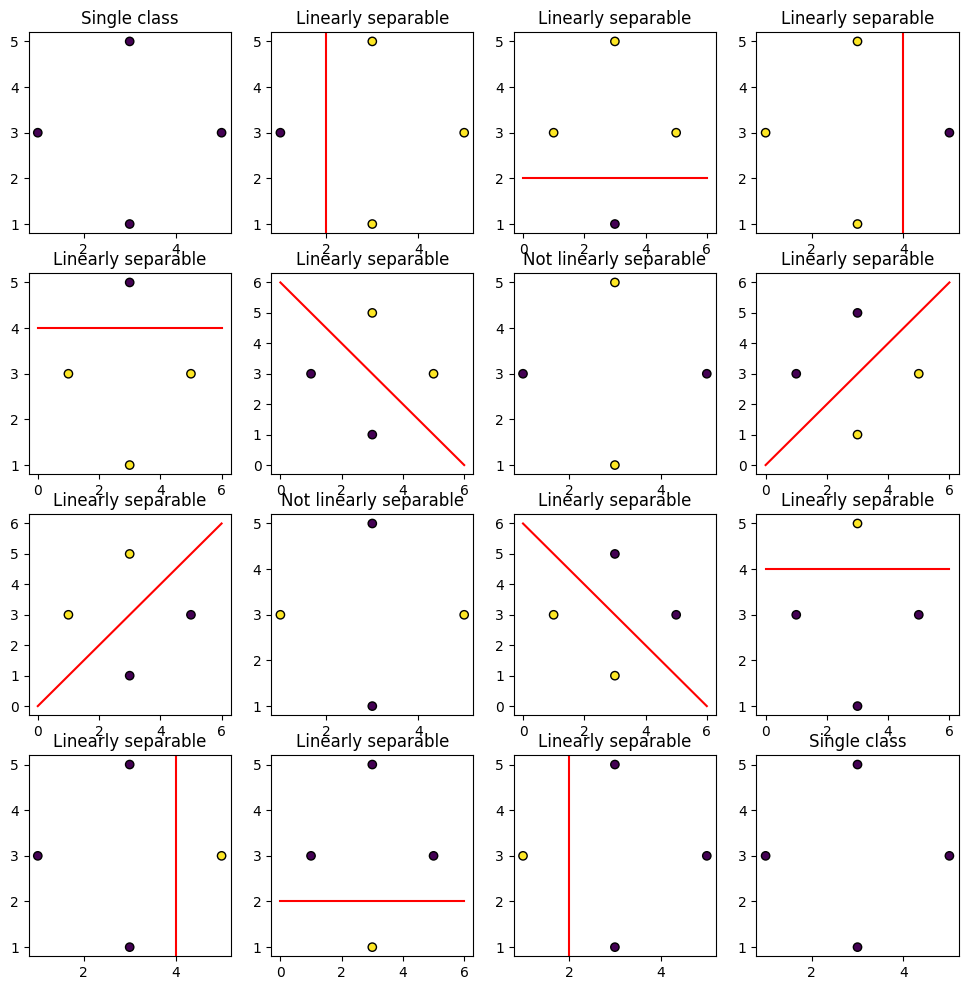

In [63]:
is_shattered_plot(S_2, Y)

### d)

In [65]:
vc = []
import tqdm
for d in tqdm.tqdm(range(2,11)):
    for n in list(range(2,20)):
        shattered = False
        for _ in range(50):
            S_n = np.random.normal(size=(n,d))
            shattered = is_shattered(d,n,S_n)
            if shattered:
                break
        if not shattered:
            vc.append(n) 
            break

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [03:03<00:00, 20.37s/it]


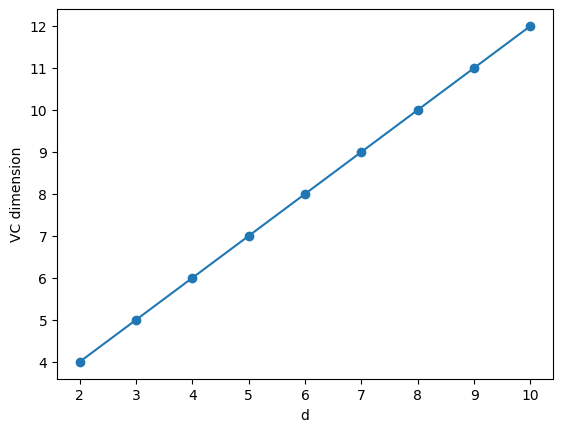

In [66]:
plt.plot(range(2,11),vc,'-o')
plt.xlabel('d')
plt.ylabel('VC dimension')
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM